# Explore here

In [119]:
import pandas as pd


data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

data.head()



id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [120]:
# Dimesiones

data.shape

(48895, 16)

In [121]:
# Obtener información sobre tipos de datos y valores no nulos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Existen un total de 48895 filas  y 15 columnas.
las variables con mas cantidad de nulos son  "last_review" y "reviews_per_month".

por otra parte, tenemos:

8 características categóricas las cuales son: id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365.
8 características numéricas las cuales son: latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count.

In [122]:
# visualizar duplicado


data.drop("host_id", axis = 1).duplicated().sum()


np.int64(0)

In [123]:
# Eliminar información irrelevante


data.drop(["id", "name", "host_name"], axis = 1, inplace = True)
data.head()

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

las columnas "id", "name" y "host_name" se han eliminado ya que no presentan informacion relevante para el analisis de los datos que se nos solicita, para el usuario al momento de la botecion de los datos fue relevante pero para nuestro analisis no lo son.

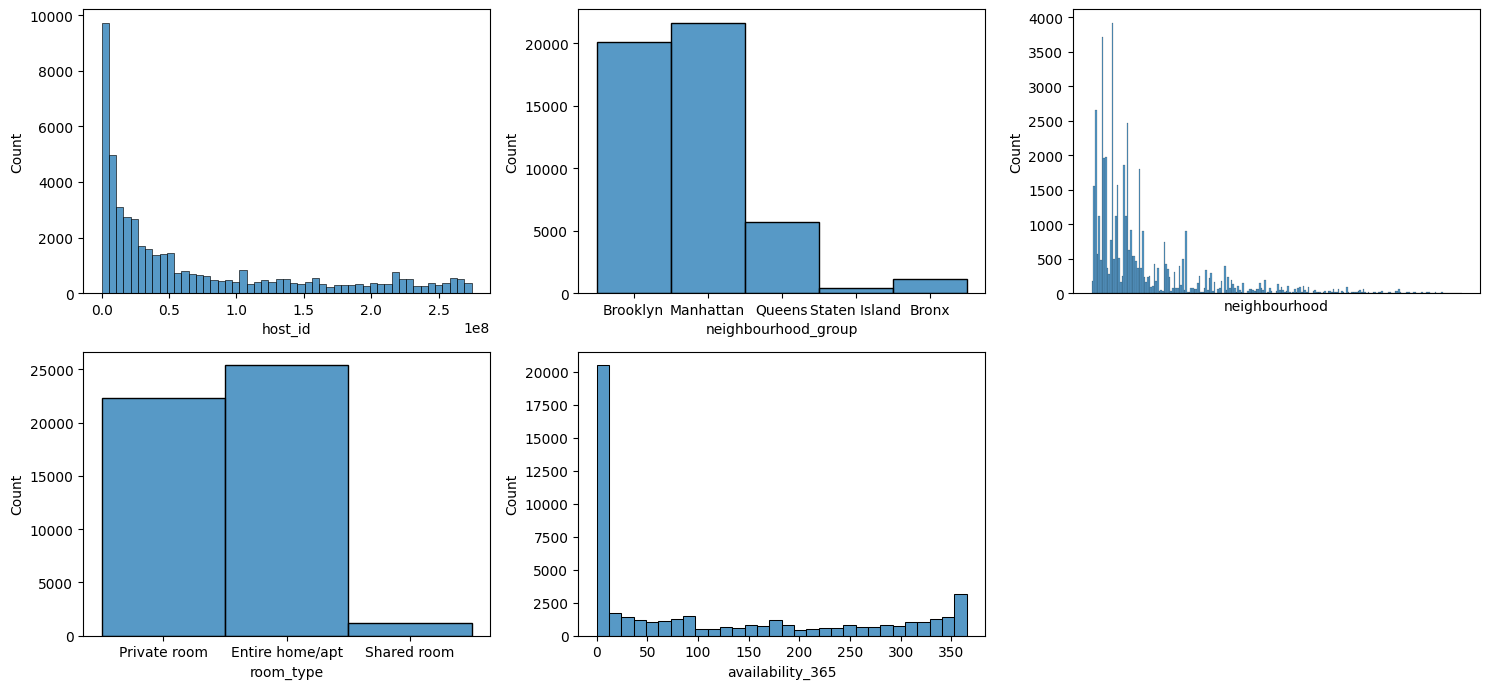

In [124]:
# Análisis sobre variables categóricas


import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(15, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = data, x = "host_id")
sns.histplot(ax = axis[0,1], data = data, x = "neighbourhood_group")
sns.histplot(ax = axis[0,2], data = data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = data, x = "room_type")
sns.histplot(ax = axis[1,1], data = data, x = "availability_365")
fig.delaxes(axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


Host_id: podemos observar que tenemos anfitiones con varias propiedades para alquilar.

neighbourhood_group: nos muestra que efectivamente estamos trabajando solo con datos de la ciudad de New York ya que solo nos muestra informacion de las 5 areas que lo conforman.

neighbourhood: nos muestra que tenemos mas disponibilidad para alquiler en unos barrios que en otros.

room_type: la mayor cantidad de ofertas para alquilar son casas/apartamentos completos, siguiedole muy de cerca habitaciones privadas y quedando muy por detras habitaciones compartidas pero aunn asi se pueden encontrar algunas.

availability_365: nos encontramos que la mayoria de las propiedades se encuentran disponibles los 365 dias del año en su ayoria.

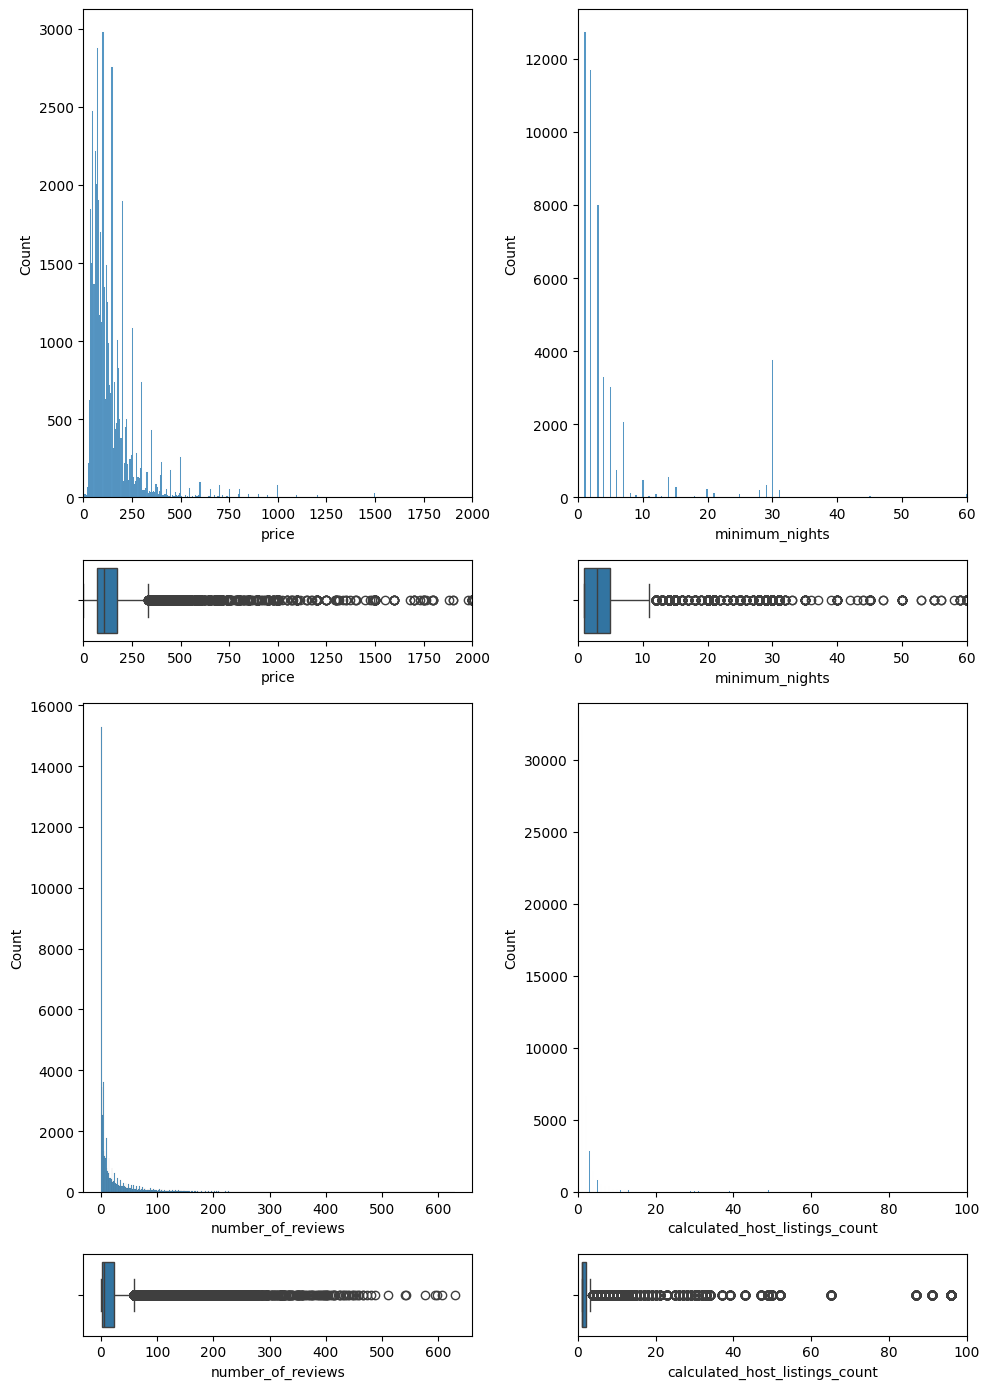

In [125]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "price").set_xlim(0, 2000)
sns.boxplot(ax = axis[1, 0], data = data, x = "price").set_xlim(0, 2000)


sns.histplot(ax = axis[0, 1], data = data, x = "minimum_nights").set_xlim(0, 60)
sns.boxplot(ax = axis[1, 1], data = data, x = "minimum_nights").set_xlim(0, 60)

sns.histplot(ax = axis[2, 0], data = data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = data, x = "number_of_reviews")

sns.histplot(ax = axis[2, 1], data = data, x = "calculated_host_listings_count").set_xlim(0, 100)
sns.boxplot(ax = axis[3, 1], data = data, x = "calculated_host_listings_count").set_xlim(0, 100)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Analisis de variables multivariante

Analisis numérico-numérico

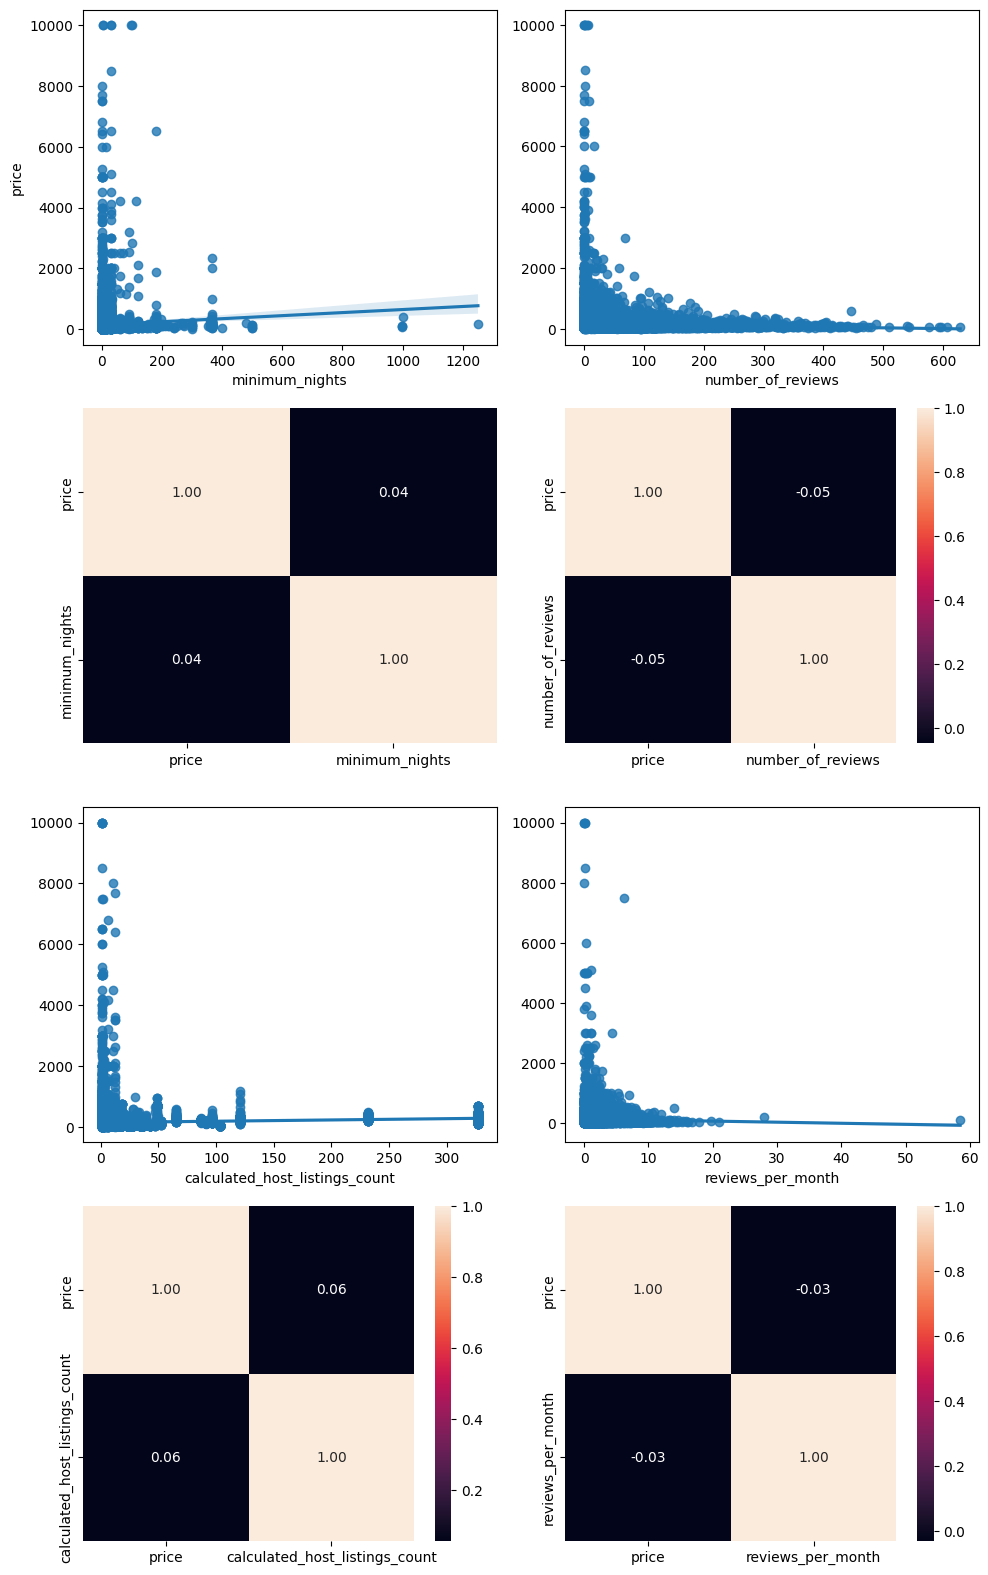

In [126]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = data, x = "minimum_nights", y = "price")
sns.heatmap(data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)


sns.regplot(ax=axis[2, 1], data=data, x="reviews_per_month", y="price").set(ylabel=None)
sns.heatmap(data[["price", "reviews_per_month"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1]).set(ylabel=None)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Se puede visualizar en las graficas que no existe correlacion entre las variables numericas vitas en comparacion con el precio.

Analisis categorico-categorico

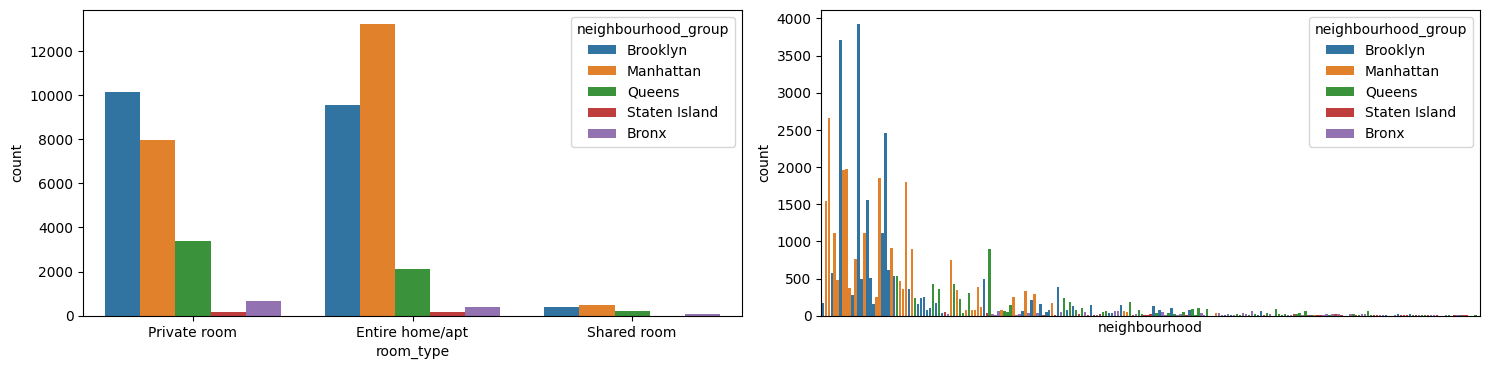

In [127]:
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = data, x = "room_type", hue = "neighbourhood_group")
sns.countplot(ax = axis[0, 1], data = data, x = "neighbourhood", hue = "neighbourhood_group").set_xticks([])

fig.delaxes(axis[1, 0])
fig.delaxes(axis[1, 1])

plt.tight_layout()


plt.show()

En el grafico de la izquierda podemos observar que "Entire home/apt" es el tipo de habitación más frecuente en Manhattan y Brooklyn, mientras que las "Private room" también son muy comunes en Brooklyn. Las "Shared room" son significativamente menos comunes en todos los grupos.
en base a esto podemos decir que no hay gran relevancia entre el tipo de habitacion y el barrio.

El grafico de la derecha se puede inferir que los picos más altos corresponden a vecindarios en Brooklyn y Manhattan, lo que refuerza la observación del primer gráfico sobre la dominancia de estos grupos en la oferta de alojamiento. La oferta de alojamientos no está distribuida uniformemente entre los vecindarios; en cambio, se concentra en áreas específicas dentro de los grupos de vecindarios más grandes como Brooklyn y Manhattan.



Combinaciones de la clase con varias predictoras

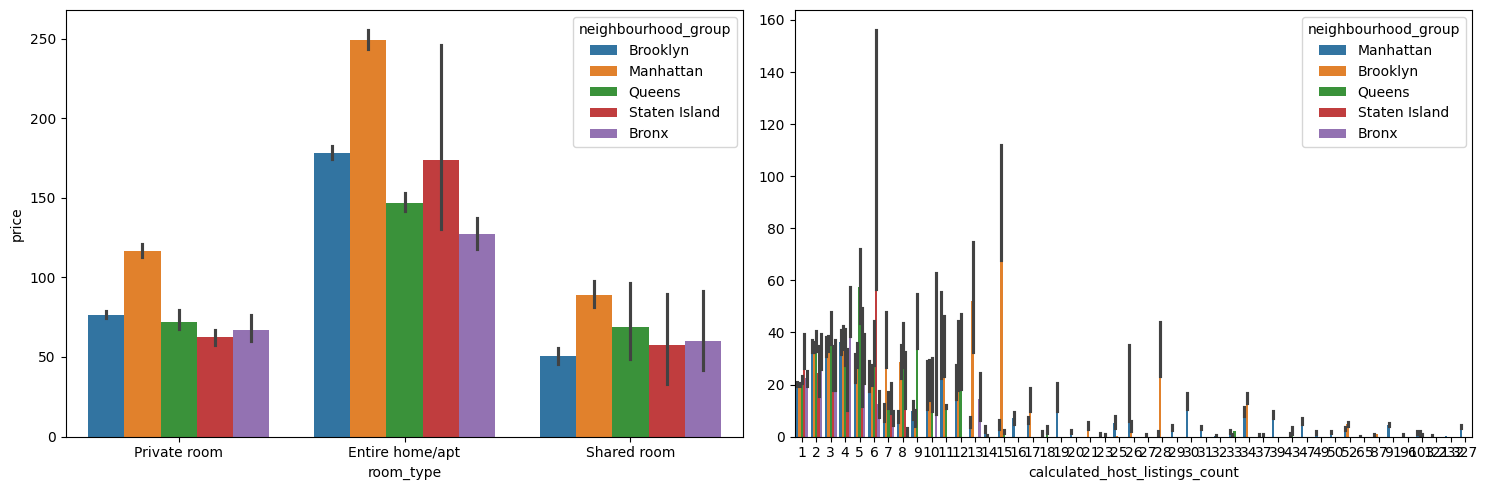

In [128]:
fig, axis = plt.subplots(figsize = (15, 5), ncols = 2)

sns.barplot(ax = axis[0], data = data, x = "room_type", y = "price", hue = "neighbourhood_group")
sns.barplot(ax = axis[1], data = data, x = "calculated_host_listings_count", y = "number_of_reviews", hue = "neighbourhood_group").set(ylabel = None)


plt.tight_layout()

plt.show()

En el grafico de la izquierda observamos que los tipos de habitaciones más comunes cambian bastante según el vecindario y su grupo. Por ejemplo, en zonas de "Manhattan" hay muchas casas o apartamentos completos, En cambio, en "Brooklyn", aunque también hay apartamentos enteros. Las habitaciones compartidas no son tan habituales en estas zonas.

El gráfico de la derecha muestra que, por lo general, a más propiedades que tiene un anfitrión, más reseñas suele recibir. Esto tiene sentido, ya que más propiedades significan más posibilidades de que los huéspedes dejen una opinión. Sin embargo, esta relación no es igual en todos los grupos de vecindarios. Por ejemplo, en "Manhattan", parece que se consiguen bastantes reseñas incluso sin tener muchísimas propiedades, mientras que en "Brooklyn", el número de reseñas puede ser un poco menor si lo comparamos con la cantidad de propiedades que tienen los anfitriones.

Analisis numerico-categorico (completo)

In [129]:
data["room_type_n"] = pd.factorize(data["room_type"])[0]
data[["room_type_n", "room_type"]]

room_type_n        room_type
0                0     Private room
1                1  Entire home/apt
2                0     Private room
3                1  Entire home/apt
4                1  Entire home/apt
...            ...              ...
48890            0     Private room
48891            0     Private room
48892            1  Entire home/apt
48893            2      Shared room
48894            0     Private room

[48895 rows x 2 columns]

In [130]:
data[["room_type_n", "room_type"]].drop_duplicates()

room_type_n        room_type
0             0     Private room
1             1  Entire home/apt
39            2      Shared room

In [131]:
room_type_transformation_rules = {row["room_type"]: row["room_type_n"] for index, row in data[["room_type_n", "room_type"]].dropna().drop_duplicates().iterrows()}
print(room_type_transformation_rules)

import json

# Escritura
with open("./room_type_transformation_rules.json", "w") as f:
  json.dump(room_type_transformation_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./room_type_transformation_rules.json", "r") as f:
  room_type_transformation_rules = json.load(f)

import numpy as np

data["room_type_n"] = data["room_type"].apply(lambda x: room_type_transformation_rules[x] if not pd.isna(x) else np.nan)
data

{'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}


host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0          2787            Brooklyn          Kensington  40.64749  -73.97237   
1          2845           Manhattan             Midtown  40.75362  -73.98377   
2          4632           Manhattan              Harlem  40.80902  -73.94190   
3          4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4          7192           Manhattan         East Harlem  40.79851  -73.94399   
...         ...                 ...                 ...       ...        ...   
48890   8232441            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891   6570630            Brooklyn            Bushwick  40.70184  -73.93317   
48892  23492952           Manhattan              Harlem  40.81475  -73.94867   
48893  30985759           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894  68119814           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    149               1                  9  2018-10-19   
1      Entire home/apt    225               1                 45  2019-05-21   
2         Private room    150               3                  0         NaN   
3      Entire home/apt     89               1                270  2019-07-05   
4      Entire home/apt     80              10                  9  2018-11-19   
...                ...    ...             ...                ...         ...   
48890     Private room     70               2                  0         NaN   
48891     Private room     40               4                  0         NaN   
48892  Entire home/apt    115              10                  0         NaN   
48893      Shared room     55               1                  0         NaN   
48894     Private room     90               7                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.21                               6               365   
1                   0.38                               2               355   
2                    NaN                               1               365   
3                   4.64                               1               194   
4                   0.10                               1                 0   
...                  ...                             ...               ...   
48890                NaN                               2                 9   
48891                NaN                               2                36   
48892                NaN                               1                27   
48893                NaN                               6                 2   
48894                NaN                               1                23   

       room_type_n  
0                0  
1                1  
2                0  
3                1  
4                1  
...            ...  
48890            0  
48891            0  
48892            1  
48893            2  
48894            0  

[48895 rows x 14 columns]

In [132]:
data["neighbourhood_group_n"] = pd.factorize(data["neighbourhood_group"])[0]
data[["neighbourhood_group_n", "neighbourhood_group"]]

neighbourhood_group_n neighbourhood_group
0                          0            Brooklyn
1                          1           Manhattan
2                          1           Manhattan
3                          0            Brooklyn
4                          1           Manhattan
...                      ...                 ...
48890                      0            Brooklyn
48891                      0            Brooklyn
48892                      1           Manhattan
48893                      1           Manhattan
48894                      1           Manhattan

[48895 rows x 2 columns]

In [133]:
data[["neighbourhood_group_n", "neighbourhood_group"]].drop_duplicates()

neighbourhood_group_n neighbourhood_group
0                        0            Brooklyn
1                        1           Manhattan
46                       2              Queens
169                      3       Staten Island
171                      4               Bronx

In [134]:
neighbourhood_group_transformation_rules = {row["neighbourhood_group"]: row["neighbourhood_group_n"] for index, row in data[["neighbourhood_group_n", "neighbourhood_group"]].dropna().drop_duplicates().iterrows()}
print(neighbourhood_group_transformation_rules)


# Escritura
with open("./neighbourhood_group_transformation_rules.json", "w") as f:
  json.dump(neighbourhood_group_transformation_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./neighbourhood_group_transformation_rules.json", "r") as f:
  neighbourhood_group_transformation_rules = json.load(f)

import numpy as np

data["neighbourhood_group_n"] = data["neighbourhood_group"].apply(lambda x: neighbourhood_group_transformation_rules[x] if not pd.isna(x) else np.nan)
data

{'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2, 'Staten Island': 3, 'Bronx': 4}


host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0          2787            Brooklyn          Kensington  40.64749  -73.97237   
1          2845           Manhattan             Midtown  40.75362  -73.98377   
2          4632           Manhattan              Harlem  40.80902  -73.94190   
3          4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4          7192           Manhattan         East Harlem  40.79851  -73.94399   
...         ...                 ...                 ...       ...        ...   
48890   8232441            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891   6570630            Brooklyn            Bushwick  40.70184  -73.93317   
48892  23492952           Manhattan              Harlem  40.81475  -73.94867   
48893  30985759           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894  68119814           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    149               1                  9  2018-10-19   
1      Entire home/apt    225               1                 45  2019-05-21   
2         Private room    150               3                  0         NaN   
3      Entire home/apt     89               1                270  2019-07-05   
4      Entire home/apt     80              10                  9  2018-11-19   
...                ...    ...             ...                ...         ...   
48890     Private room     70               2                  0         NaN   
48891     Private room     40               4                  0         NaN   
48892  Entire home/apt    115              10                  0         NaN   
48893      Shared room     55               1                  0         NaN   
48894     Private room     90               7                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.21                               6               365   
1                   0.38                               2               355   
2                    NaN                               1               365   
3                   4.64                               1               194   
4                   0.10                               1                 0   
...                  ...                             ...               ...   
48890                NaN                               2                 9   
48891                NaN                               2                36   
48892                NaN                               1                27   
48893                NaN                               6                 2   
48894                NaN                               1                23   

       room_type_n  neighbourhood_group_n  
0                0                      0  
1                1                      1  
2                0                      1  
3                1                      0  
4                1                      1  
...            ...                    ...  
48890            0                      0  
48891            0                      0  
48892            1                      1  
48893            2                      1  
48894            0                      1  

[48895 rows x 15 columns]

In [135]:
data["neighbourhood_n"] = pd.factorize(data["neighbourhood"])[0]
data[["neighbourhood_n", "neighbourhood"]]

neighbourhood_n       neighbourhood
0                    0          Kensington
1                    1             Midtown
2                    2              Harlem
3                    3        Clinton Hill
4                    4         East Harlem
...                ...                 ...
48890                6  Bedford-Stuyvesant
48891               21            Bushwick
48892                2              Harlem
48893                7      Hell's Kitchen
48894                7      Hell's Kitchen

[48895 rows x 2 columns]

In [136]:
data[["neighbourhood_n", "neighbourhood"]].drop_duplicates()

neighbourhood_n neighbourhood
0                    0    Kensington
1                    1       Midtown
2                    2        Harlem
3                    3  Clinton Hill
4                    4   East Harlem
...                ...           ...
29738              216   Bull's Head
30489              217      New Dorp
33261              218     Rossville
33698              219  Breezy Point
34161              220   Willowbrook

[221 rows x 2 columns]

In [137]:
neighbourhood_transformation_rules = {row["neighbourhood"]: row["neighbourhood_n"] for index, row in data[["neighbourhood_n", "neighbourhood"]].dropna().drop_duplicates().iterrows()}
print(neighbourhood_transformation_rules)


# Escritura
with open("./neighbourhood_transformation_rules.json", "w") as f:
  json.dump(neighbourhood_transformation_rules, f)

# Lectura
# ESTO NO NECESITAIS HACERLO AHORA. LO ENTENDEREIS MAS ADELANTE :)
with open("./neighbourhood_transformation_rules.json", "r") as f:
  neighbourhood_transformation_rules = json.load(f)

import numpy as np

data["neighbourhood_n"] = data["neighbourhood"].apply(lambda x: neighbourhood_transformation_rules[x] if not pd.isna(x) else np.nan)
data

{'Kensington': 0, 'Midtown': 1, 'Harlem': 2, 'Clinton Hill': 3, 'East Harlem': 4, 'Murray Hill': 5, 'Bedford-Stuyvesant': 6, "Hell's Kitchen": 7, 'Upper West Side': 8, 'Chinatown': 9, 'South Slope': 10, 'West Village': 11, 'Williamsburg': 12, 'Fort Greene': 13, 'Chelsea': 14, 'Crown Heights': 15, 'Park Slope': 16, 'Windsor Terrace': 17, 'Inwood': 18, 'East Village': 19, 'Greenpoint': 20, 'Bushwick': 21, 'Flatbush': 22, 'Lower East Side': 23, 'Prospect-Lefferts Gardens': 24, 'Long Island City': 25, 'Kips Bay': 26, 'SoHo': 27, 'Upper East Side': 28, 'Prospect Heights': 29, 'Washington Heights': 30, 'Woodside': 31, 'Brooklyn Heights': 32, 'Carroll Gardens': 33, 'Gowanus': 34, 'Flatlands': 35, 'Cobble Hill': 36, 'Flushing': 37, 'Boerum Hill': 38, 'Sunnyside': 39, 'DUMBO': 40, 'St. George': 41, 'Highbridge': 42, 'Financial District': 43, 'Ridgewood': 44, 'Morningside Heights': 45, 'Jamaica': 46, 'Middle Village': 47, 'NoHo': 48, 'Ditmars Steinway': 49, 'Flatiron District': 50, 'Roosevelt Is

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0          2787            Brooklyn          Kensington  40.64749  -73.97237   
1          2845           Manhattan             Midtown  40.75362  -73.98377   
2          4632           Manhattan              Harlem  40.80902  -73.94190   
3          4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4          7192           Manhattan         East Harlem  40.79851  -73.94399   
...         ...                 ...                 ...       ...        ...   
48890   8232441            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891   6570630            Brooklyn            Bushwick  40.70184  -73.93317   
48892  23492952           Manhattan              Harlem  40.81475  -73.94867   
48893  30985759           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894  68119814           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    149               1                  9  2018-10-19   
1      Entire home/apt    225               1                 45  2019-05-21   
2         Private room    150               3                  0         NaN   
3      Entire home/apt     89               1                270  2019-07-05   
4      Entire home/apt     80              10                  9  2018-11-19   
...                ...    ...             ...                ...         ...   
48890     Private room     70               2                  0         NaN   
48891     Private room     40               4                  0         NaN   
48892  Entire home/apt    115              10                  0         NaN   
48893      Shared room     55               1                  0         NaN   
48894     Private room     90               7                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.21                               6               365   
1                   0.38                               2               355   
2                    NaN                               1               365   
3                   4.64                               1               194   
4                   0.10                               1                 0   
...                  ...                             ...               ...   
48890                NaN                               2                 9   
48891                NaN                               2                36   
48892                NaN                               1                27   
48893                NaN                               6                 2   
48894                NaN                               1                23   

       room_type_n  neighbourhood_group_n  neighbourhood_n  
0                0                      0                0  
1                1                      1                1  
2                0                      1                2  
3                1                      0                3  
4                1                      1                4  
...            ...                    ...              ...  
48890            0                      0                6  
48891            0                      0               21  
48892            1                      1                2  
48893            2                      1                7  
48894            0                      1                7  

[48895 rows x 16 columns]

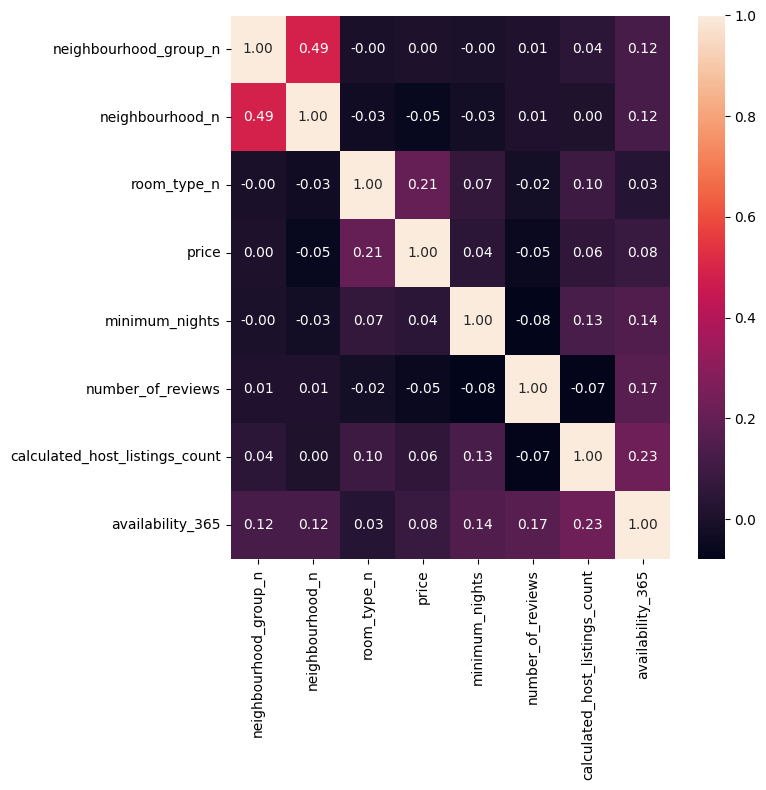

In [138]:

fig, axes = plt.subplots(figsize=(8, 8))

sns.heatmap(data[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")


plt.tight_layout()

# Draw Plot
plt.show()

El mapa de calor muestra la relación entre números en los datos y vemos que los anfitriones con más propiedades suelen tener más reseñas, pero la mayoría de las otras variables numéricas, como el precio, tienen poca relación entre sí.

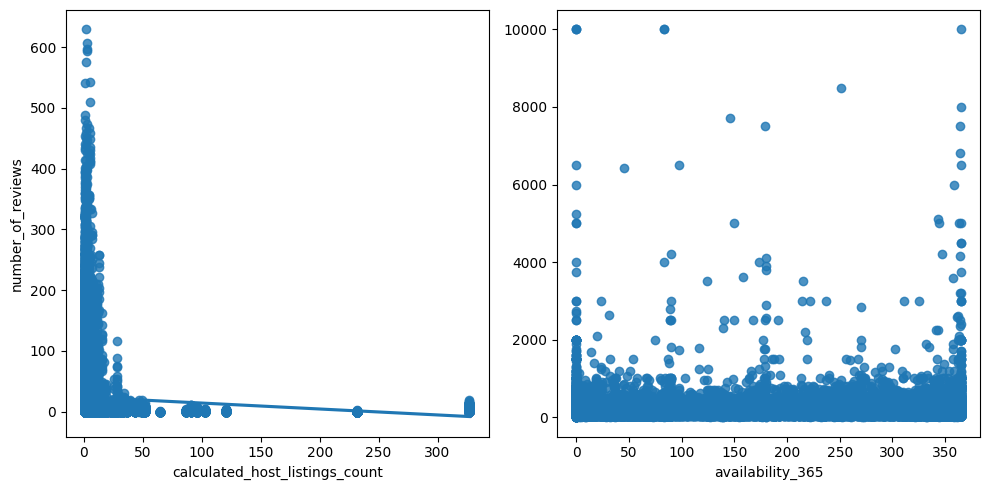

In [139]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = data, x = "calculated_host_listings_count", y = "number_of_reviews")
sns.regplot(ax = axis[1], data = data, x = "availability_365", y = "price").set(ylabel = None)

plt.tight_layout()

plt.show()

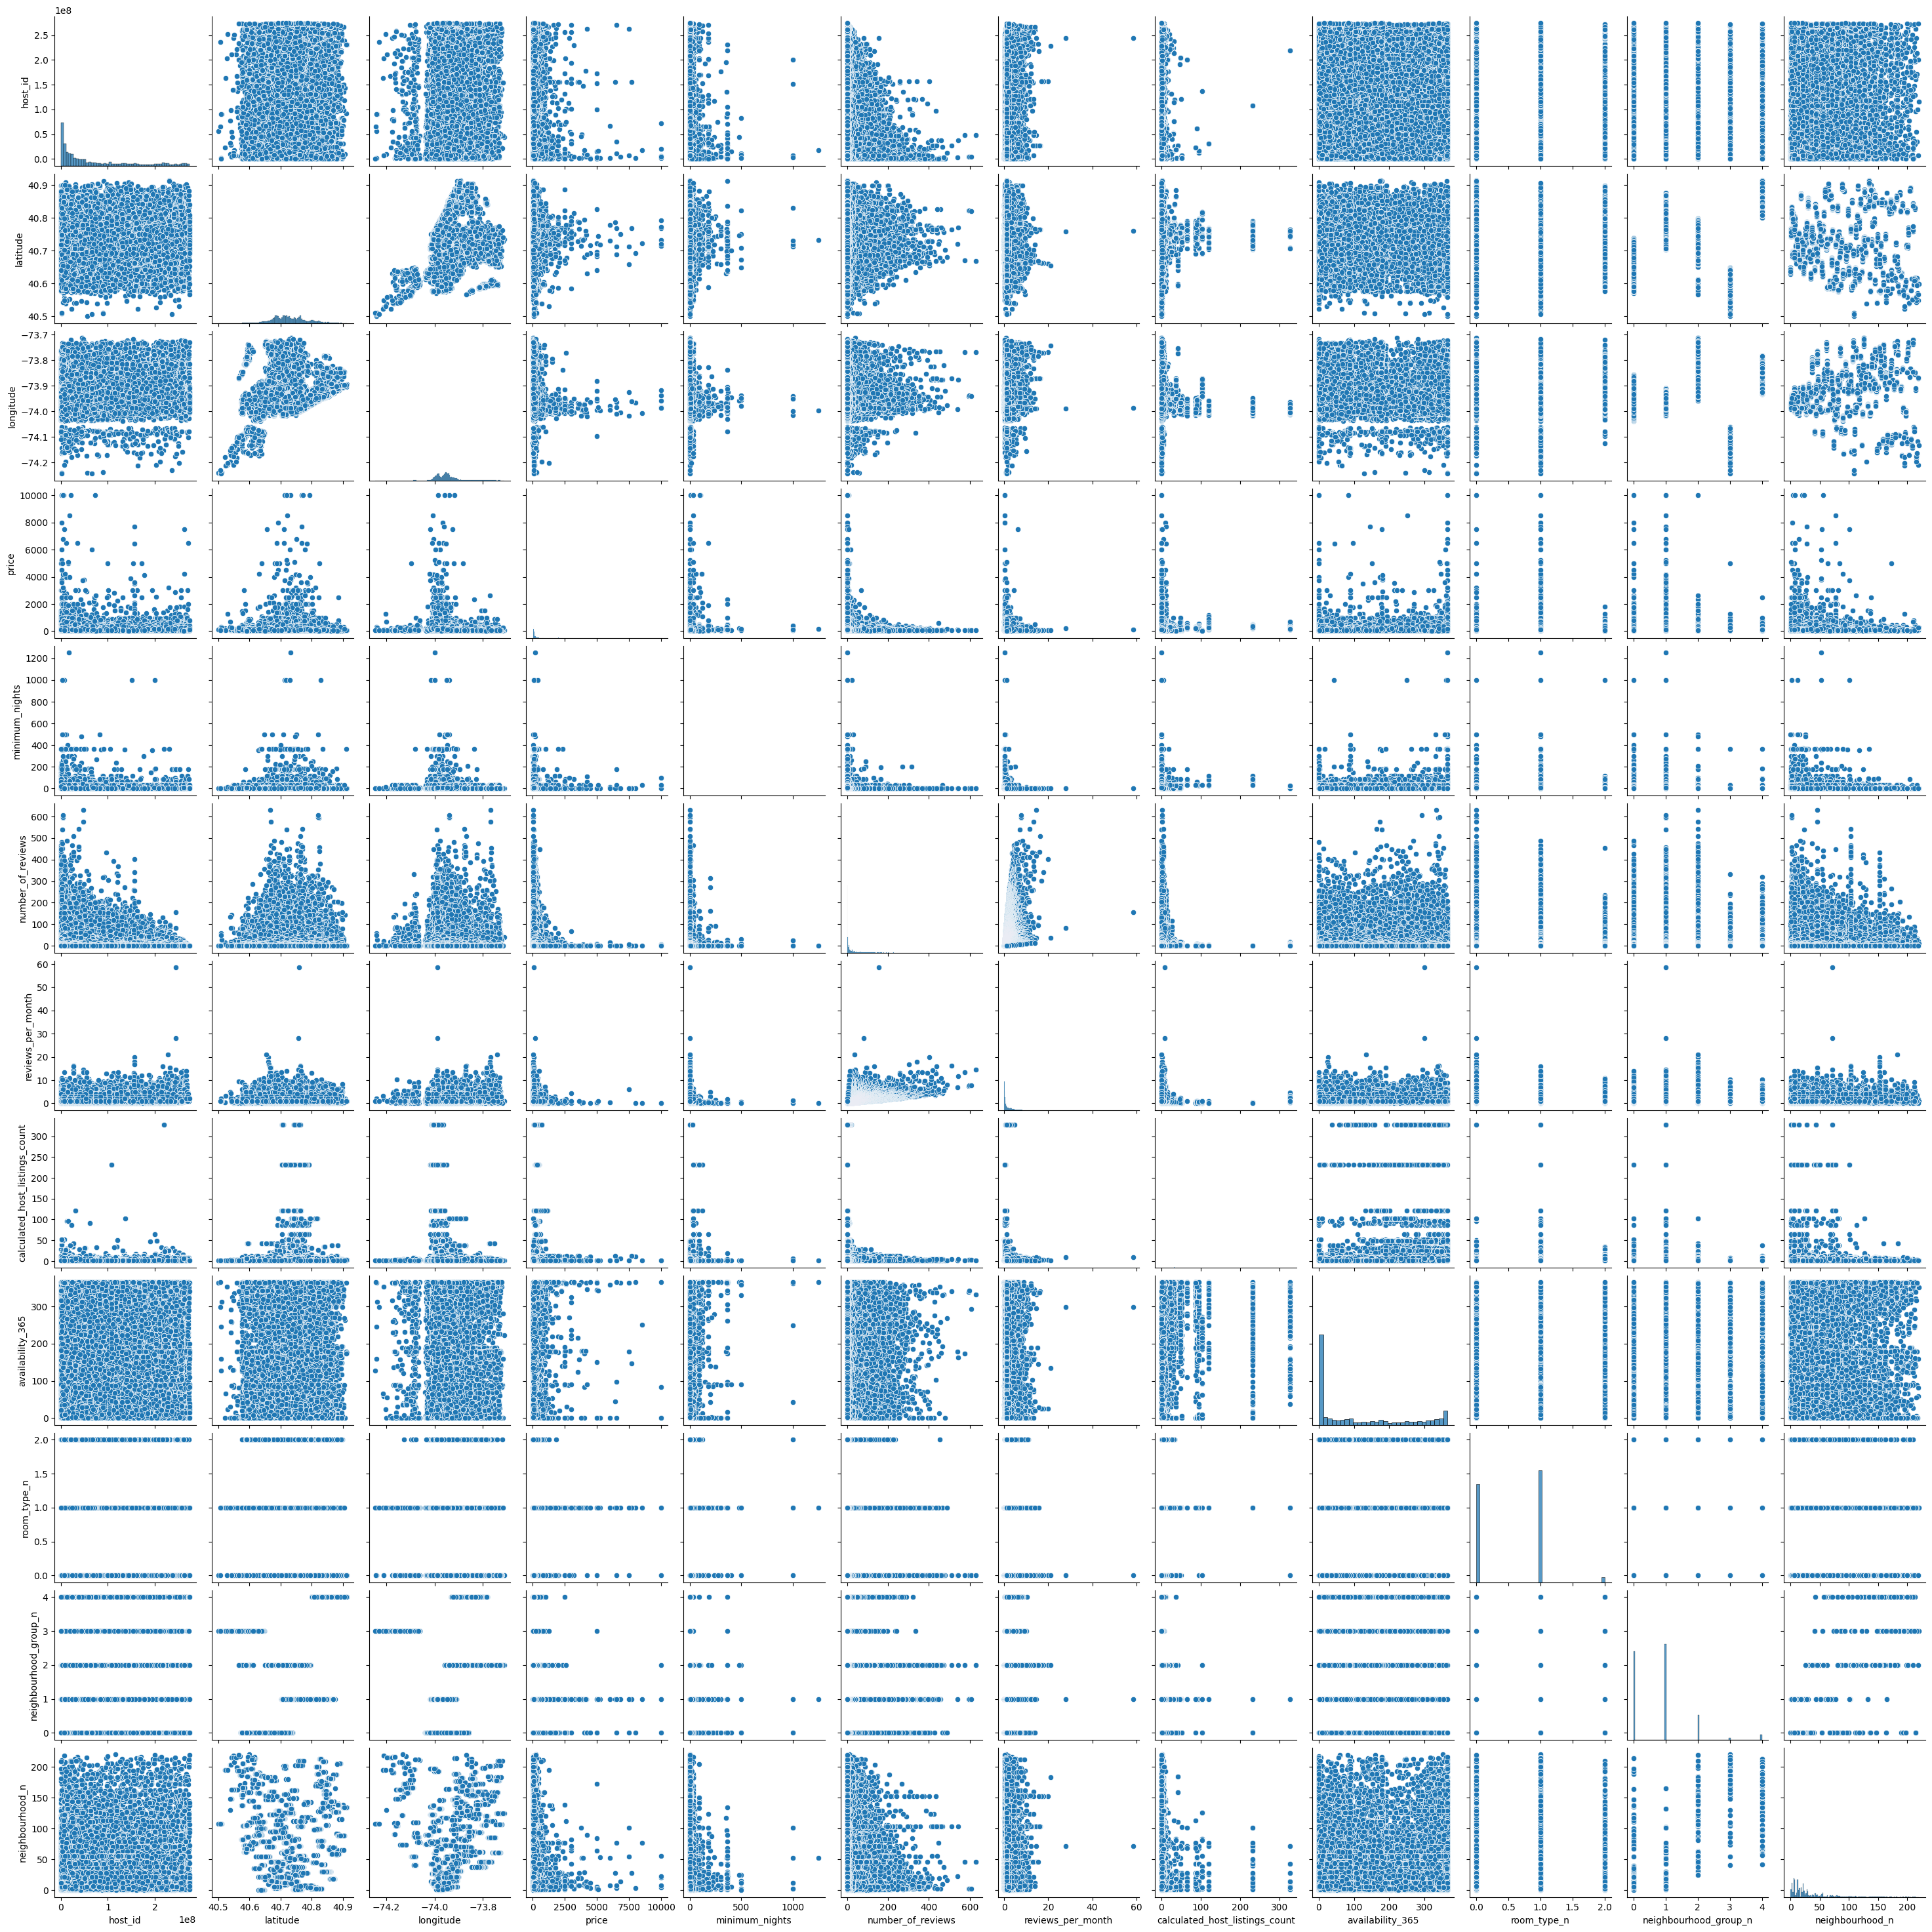

In [140]:
sns.pairplot(data = data)

Ingenieria de caracteristicas

valores atipicos

In [141]:
data.describe()

host_id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000   
mean   6.762001e+07     40.728949    -73.952170    152.720687        7.029962   
std    7.861097e+07      0.054530      0.046157    240.154170       20.510550   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.822033e+06     40.690100    -73.983070     69.000000        1.000000   
50%    3.079382e+07     40.723070    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763115    -73.936275    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365   room_type_n  neighbourhood_group_n  neighbourhood_n  
count      48895.000000  48895.000000           48895.000000     48895.000000  
mean         112.781327      0.567113               0.786911        29.888782  
std          131.622289      0.541249               0.844386        34.676634  
min            0.000000      0.000000               0.000000         0.000000  
25%            0.000000      0.000000               0.000000         7.500000  
50%           45.000000      1.000000               1.000000        19.000000  
75%          227.000000      1.000000               1.000000        37.000000  
max          365.000000      2.000000               4.000000       220.000000

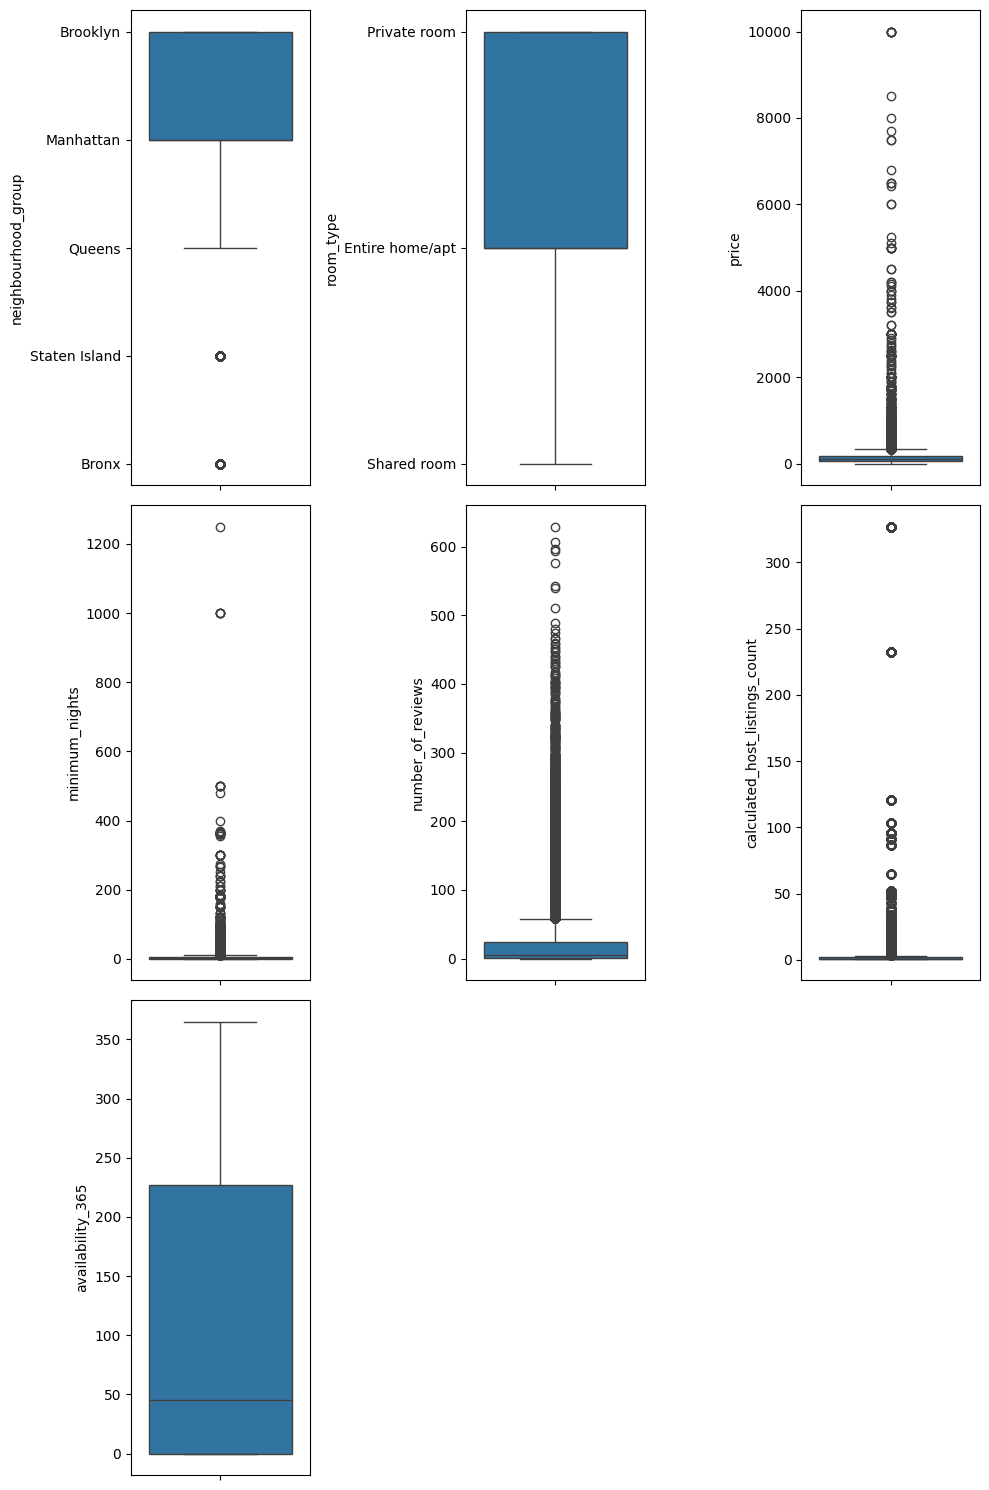

In [142]:
fig, axes = plt.subplots(3, 3, figsize = (10, 15))

sns.boxplot(ax = axes[0, 0], data = data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = data, y = "room_type")
sns.boxplot(ax = axes[0, 2], data = data, y = "price")
sns.boxplot(ax = axes[1, 0], data = data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 1], data = data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 2], data = data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[2, 0], data = data, y = "availability_365")
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.tight_layout()

plt.show()

Deteccion de valores atipicos.

In [143]:
data_CON_outliers = data.copy()

data_SIN_outliers = data.copy()
# Para cada una de las variables con outliers en mi problema, tengo que reemplazar sus valores del DF

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["minimum_nights", "number_of_reviews", "calculated_host_listings_count"]:
  data_SIN_outliers, limit_list = replace_outliers_from_column(column, data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'minimum_nights': [1, np.float64(11.0)],
 'number_of_reviews': [0, np.float64(58.5)],
 'calculated_host_listings_count': [1, np.float64(3.5)]}

In [144]:
data_CON_outliers

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0          2787            Brooklyn          Kensington  40.64749  -73.97237   
1          2845           Manhattan             Midtown  40.75362  -73.98377   
2          4632           Manhattan              Harlem  40.80902  -73.94190   
3          4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4          7192           Manhattan         East Harlem  40.79851  -73.94399   
...         ...                 ...                 ...       ...        ...   
48890   8232441            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891   6570630            Brooklyn            Bushwick  40.70184  -73.93317   
48892  23492952           Manhattan              Harlem  40.81475  -73.94867   
48893  30985759           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894  68119814           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    149               1                  9  2018-10-19   
1      Entire home/apt    225               1                 45  2019-05-21   
2         Private room    150               3                  0         NaN   
3      Entire home/apt     89               1                270  2019-07-05   
4      Entire home/apt     80              10                  9  2018-11-19   
...                ...    ...             ...                ...         ...   
48890     Private room     70               2                  0         NaN   
48891     Private room     40               4                  0         NaN   
48892  Entire home/apt    115              10                  0         NaN   
48893      Shared room     55               1                  0         NaN   
48894     Private room     90               7                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.21                               6               365   
1                   0.38                               2               355   
2                    NaN                               1               365   
3                   4.64                               1               194   
4                   0.10                               1                 0   
...                  ...                             ...               ...   
48890                NaN                               2                 9   
48891                NaN                               2                36   
48892                NaN                               1                27   
48893                NaN                               6                 2   
48894                NaN                               1                23   

       room_type_n  neighbourhood_group_n  neighbourhood_n  
0                0                      0                0  
1                1                      1                1  
2                0                      1                2  
3                1                      0                3  
4                1                      1                4  
...            ...                    ...              ...  
48890            0                      0                6  
48891            0                      0               21  
48892            1                      1                2  
48893            2                      1                7  
48894            0                      1                7  

[48895 rows x 16 columns]

In [145]:
data_SIN_outliers

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0          2787            Brooklyn          Kensington  40.64749  -73.97237   
1          2845           Manhattan             Midtown  40.75362  -73.98377   
2          4632           Manhattan              Harlem  40.80902  -73.94190   
3          4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4          7192           Manhattan         East Harlem  40.79851  -73.94399   
...         ...                 ...                 ...       ...        ...   
48890   8232441            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891   6570630            Brooklyn            Bushwick  40.70184  -73.93317   
48892  23492952           Manhattan              Harlem  40.81475  -73.94867   
48893  30985759           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894  68119814           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    149             1.0                9.0  2018-10-19   
1      Entire home/apt    225             1.0               45.0  2019-05-21   
2         Private room    150             3.0                0.0         NaN   
3      Entire home/apt     89             1.0               58.5  2019-07-05   
4      Entire home/apt     80            10.0                9.0  2018-11-19   
...                ...    ...             ...                ...         ...   
48890     Private room     70             2.0                0.0         NaN   
48891     Private room     40             4.0                0.0         NaN   
48892  Entire home/apt    115            10.0                0.0         NaN   
48893      Shared room     55             1.0                0.0         NaN   
48894     Private room     90             7.0                0.0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.21                             3.5               365   
1                   0.38                             2.0               355   
2                    NaN                             1.0               365   
3                   4.64                             1.0               194   
4                   0.10                             1.0                 0   
...                  ...                             ...               ...   
48890                NaN                             2.0                 9   
48891                NaN                             2.0                36   
48892                NaN                             1.0                27   
48893                NaN                             3.5                 2   
48894                NaN                             1.0                23   

       room_type_n  neighbourhood_group_n  neighbourhood_n  
0                0                      0                0  
1                1                      1                1  
2                0                      1                2  
3                1                      0                3  
4                1                      1                4  
...            ...                    ...              ...  
48890            0                      0                6  
48891            0                      0               21  
48892            1                      1                2  
48893            2                      1                7  
48894            0                      1                7  

[48895 rows x 16 columns]

In [146]:
data_CON_outliers.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10052
last_review                       10052
host_id                               0
neighbourhood_group                   0
longitude                             0
room_type                             0
neighbourhood                         0
latitude                              0
minimum_nights                        0
price                                 0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
room_type_n                           0
neighbourhood_group_n                 0
neighbourhood_n                       0
dtype: int64

Analisis de valores faltantes

In [147]:
data_SIN_outliers.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10052
last_review                       10052
host_id                               0
neighbourhood_group                   0
longitude                             0
room_type                             0
neighbourhood                         0
latitude                              0
minimum_nights                        0
price                                 0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
room_type_n                           0
neighbourhood_group_n                 0
neighbourhood_n                       0
dtype: int64

Obtencion de porcentajes por columnas de datos vacios (para posibles futuros casos)

In [148]:
data.isnull().sum().sort_values(ascending=False) / len(data)

reviews_per_month                 0.205583
last_review                       0.205583
host_id                           0.000000
neighbourhood_group               0.000000
longitude                         0.000000
room_type                         0.000000
neighbourhood                     0.000000
latitude                          0.000000
minimum_nights                    0.000000
price                             0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
room_type_n                       0.000000
neighbourhood_group_n             0.000000
neighbourhood_n                   0.000000
dtype: float64

Escalado de valores

In [152]:
from sklearn.model_selection import train_test_split

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group_n", "room_type_n"]

# Dividimos el conjunto de datos en muestras de train y test
X_CON = data_CON_outliers.drop("price", axis = 1)[num_variables]
y = data_CON_outliers["price"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = data_SIN_outliers.drop("price", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

number_of_reviews  minimum_nights  calculated_host_listings_count  \
32645                 11               3                               1   
23615                  2               2                               1   
31183                  0               2                               2   
29260                 87               3                               1   
7275                  13               5                               1   

       availability_365  neighbourhood_group_n  room_type_n  
32645                 1                      0            1  
23615                 0                      1            0  
31183                 0                      0            0  
29260               267                      0            1  
7275                  0                      2            0

Normalización

In [153]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)


### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

number_of_reviews  minimum_nights  calculated_host_listings_count  \
32645          -0.277198       -0.193025                       -0.186570   
23615          -0.479451       -0.239596                       -0.186570   
31183          -0.524396       -0.239596                       -0.156424   
29260           1.430714       -0.193025                       -0.186570   
7275           -0.232253       -0.099884                       -0.186570   

       availability_365  neighbourhood_group_n  room_type_n  
32645         -0.852862              -0.931915     0.798949  
23615         -0.860447               0.256169    -1.050482  
31183         -0.860447              -0.931915    -1.050482  
29260          1.164663              -0.931915     0.798949  
7275          -0.860447               1.444253    -1.050482

Escalado Minimo-Maximo

In [154]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)


### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

number_of_reviews  minimum_nights  calculated_host_listings_count  \
32645           0.017488        0.001601                        0.000000   
23615           0.003180        0.000801                        0.000000   
31183           0.000000        0.000801                        0.003067   
29260           0.138315        0.001601                        0.000000   
7275            0.020668        0.003203                        0.000000   

       availability_365  neighbourhood_group_n  room_type_n  
32645          0.002740                   0.00          0.5  
23615          0.000000                   0.25          0.0  
31183          0.000000                   0.00          0.0  
29260          0.731507                   0.00          0.5  
7275           0.000000                   0.50          0.0

In [151]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [164]:
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)

X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

with open("/model/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("/model/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("/model/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("/model/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

FileNotFoundError: [Errno 2] No such file or directory: '/model/normalizador_con_outliers.pkl'